In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('summer.csv')

In [3]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
df.dtypes

Year           int64
City          object
Sport         object
Discipline    object
Athlete       object
Country       object
Gender        object
Event         object
Medal         object
dtype: object

In [5]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

In [8]:
df.shape

(31161, 9)

# 1. In how many City's Summer Olympics is held so far?

In [9]:
len(df['City'].unique())

22

# 2. Which sport is having most number of Gold Medals so far?

In [10]:
data = df[df['Medal']=='Gold']

In [11]:
data

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold
...,...,...,...,...,...,...,...,...,...
31145,2012,London,Wrestling,Wrestling Freestyle,"NOROOZI, Omid Haji",IRI,Men,Wg 60 KG,Gold
31149,2012,London,Wrestling,Wrestling Freestyle,"KIM, Hyeonwoo",KOR,Men,Wg 66 KG,Gold
31153,2012,London,Wrestling,Wrestling Freestyle,"VLASOV, Roman",RUS,Men,Wg 74 KG,Gold
31157,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold


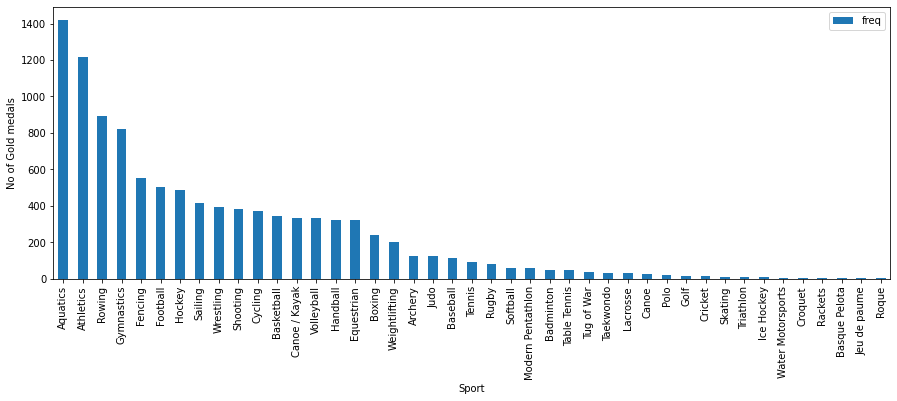

In [12]:
list1 = []

for sport in data['Sport'].unique():
    list1.append([sport,len(data[data['Sport']==sport])])

pd.DataFrame(list1,columns=['Sport','freq']).sort_values(by='freq',ascending=False).plot(x='Sport',y='freq',kind='bar',figsize=(15,5))
plt.ylabel('No of Gold medals')
plt.show()

<AxesSubplot:xlabel='Sport'>

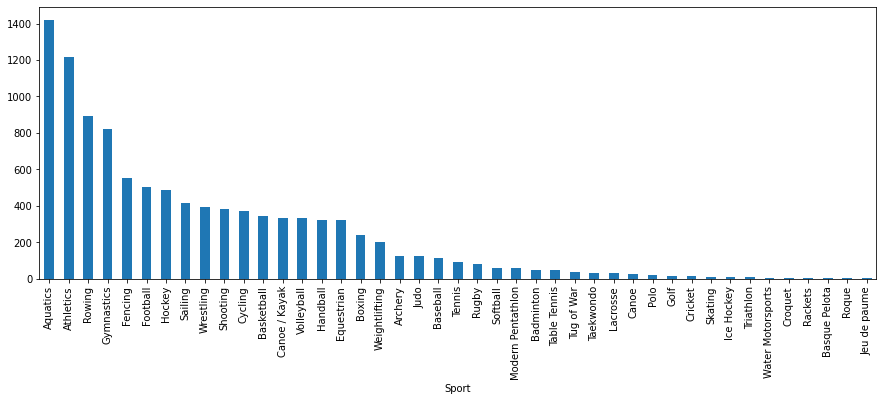

In [13]:
data.groupby('Sport').count()['Medal'].sort_values(ascending=False).plot.bar(figsize=(15,5))

# 3. Which sport is having most number of medals so far? (Top 5)

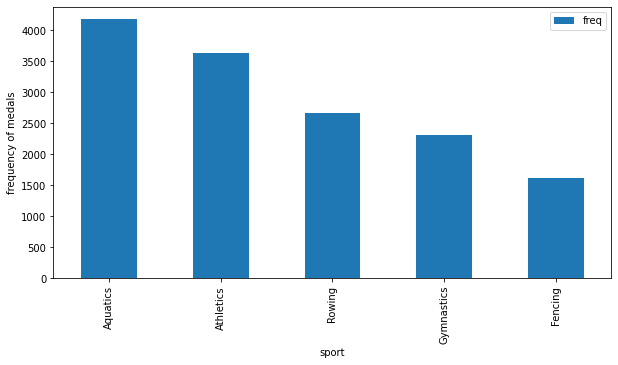

In [14]:
list2 = []
for sport in df['Sport'].unique():
    list2.append([sport,len(df[df['Sport']==sport])])
pd.DataFrame(list2,columns=['sport','freq']).sort_values(by='freq',ascending=False).head().plot(x='sport',y='freq',kind='bar',figsize=(10,5))
plt.ylabel('frequency of medals')
plt.show()

<AxesSubplot:xlabel='Sport'>

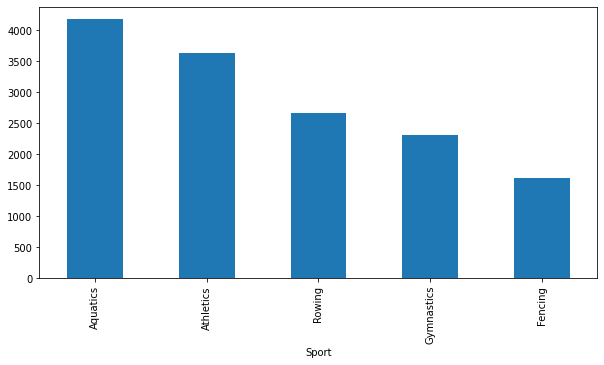

In [15]:
df.groupby('Sport').count()['Medal'].sort_values(ascending=False).head().plot.bar(figsize=(10,5))

# 4. Which player has won most number of medals? (Top 5)

<AxesSubplot:xlabel='Athlete'>

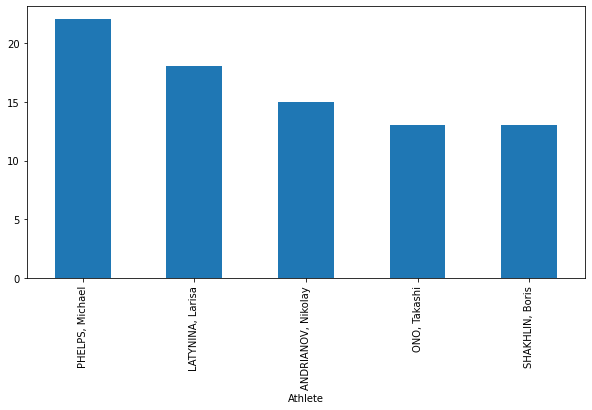

In [16]:
df.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head().plot.bar(figsize=(10,5))

# 5. Which player has won most number Gold Medals of medals? (Top 5)

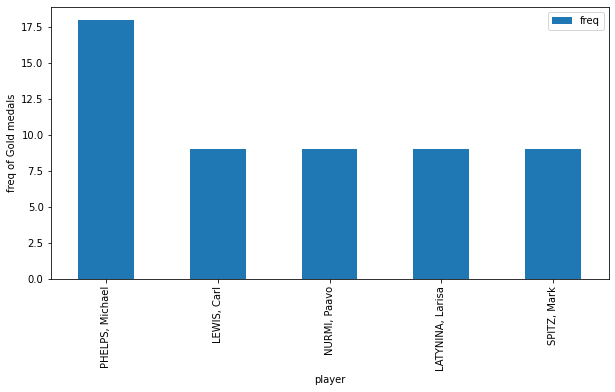

In [17]:
list4 = []
for player in data['Athlete'].unique():
    list4.append([player,len(data[data['Athlete']==player])])
pd.DataFrame(list4,columns=['player','freq']).sort_values(by='freq',ascending=False).head().plot(x='player',y='freq',kind='bar',figsize=(10,5))
plt.ylabel('freq of Gold medals')
plt.show()

<AxesSubplot:xlabel='Athlete'>

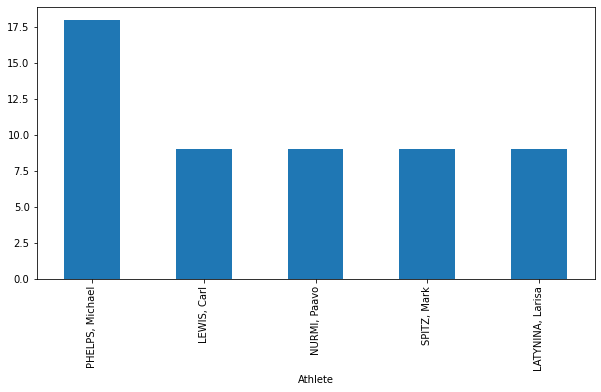

In [18]:
data.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head().plot.bar(figsize=(10,5))

# 6. In which year India won first Gold Medal in Summer Olympics?

In [19]:
data1 = data[data['Country']=='IND']

In [20]:
data1[data1['Medal']=='Gold']['Year'].min()

1928

# 7. Which event is most popular in terms on number of players? (Top 5)


<AxesSubplot:xlabel='Event'>

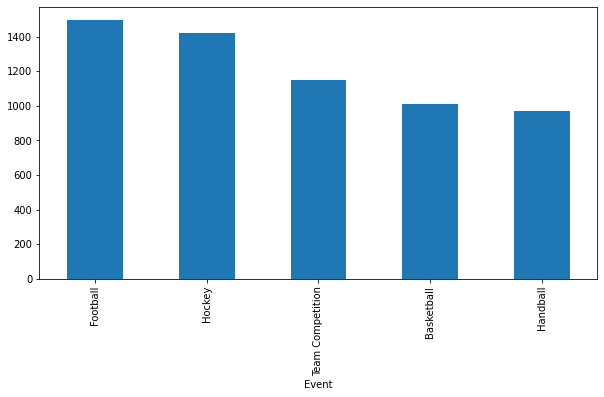

In [21]:
df.groupby('Event').count()['Athlete'].sort_values(ascending=False).head().plot.bar(figsize=(10,5))

# 8. Which sport is having most female Gold Medalists? (Top 5)

In [22]:
data['Gender'].unique()

array(['Men', 'Women'], dtype=object)

In [23]:
data = data[data['Gender']=='Women']

<AxesSubplot:xlabel='sport'>

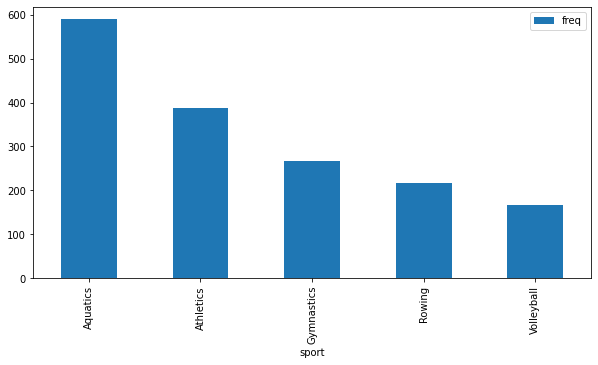

In [24]:
list6 = []
for sport in data['Sport'].unique():
    list6.append([sport,len(data[data['Sport']==sport])])
pd.DataFrame(list6,columns=['sport','freq']).sort_values(by='freq',ascending=False).head().plot(x='sport',y='freq',kind='bar',figsize=(10,5))

<AxesSubplot:xlabel='Sport'>

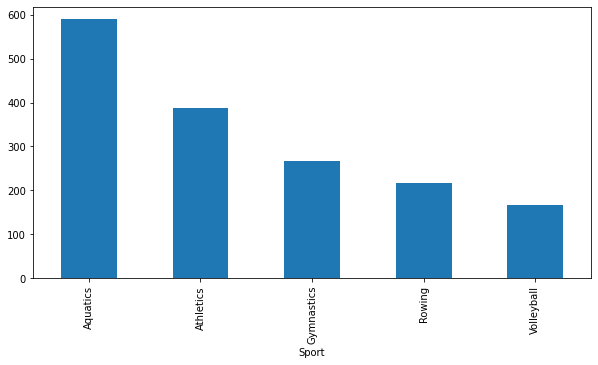

In [25]:
data.groupby('Sport').count()['Medal'].sort_values(ascending=False).head().plot.bar(figsize=(10,5))